In [1]:
import pandas as pd
from pandas import ExcelWriter, ExcelFile
import matplotlib.pyplot as plt
import numpy as np
from allan_variance import allan_variance, params_from_avar
from math import pi

# Analyse des données IMU d'un smartphone

## CSV (data) importing

In [2]:
file_name = 'imu_va_fusoff.csv'

In [3]:
# reading 'Accelerometer'
accel = pd.read_csv(file_name,usecols = [0,4,5,6], skiprows = [1,2])
accel.index = accel['timestamp']
del accel['timestamp']

In [4]:
# reading 'Gyroscope'
gyro = pd.read_csv(file_name, usecols = [0,1,2,3], skiprows = [1,2])
gyro.index = gyro['timestamp']
del gyro['timestamp']

## Display csv gyro/accelero part 

Just to make sure, we're using the good object 


In [5]:
# As a table

gyro


,omega_x,omega_y,omega_z
timestamp,,,
0.024682,-0.1250,-0.0625,-0.0625
0.036267,-0.1875,-0.2500,-0.0625
0.048131,-0.1875,-0.0625,0.0625
0.059930,-0.1875,-0.1250,-0.0625
0.071996,-0.0625,-0.0625,-0.1875
...,...,...,...
14399.944566,0.0000,-0.0625,-0.1875
14399.955981,-0.0625,0.0000,-0.1250
14399.967602,-0.0625,-0.1250,-0.1250


## Displaying specific forces and gyrometrics signal


Text(0.5, 0, 'time, s')

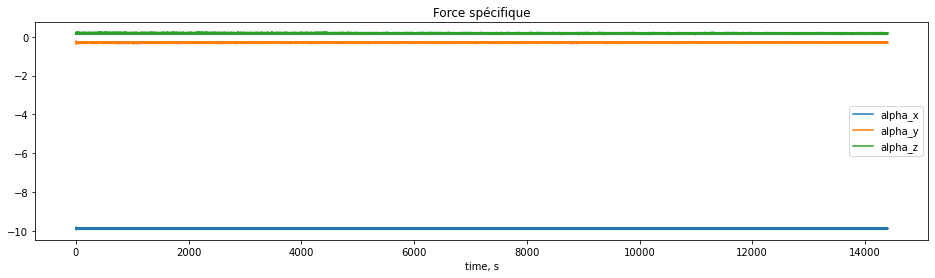

In [6]:
# Affichage des données accélérométriques
plt.figure(figsize=(16, 4))
plt.title('Force spécifique')
plt.plot(accel)
plt.legend(list(accel.columns))
plt.xlabel("time, s")

Text(0.5, 0, 'time, s')

C:\Users\jthom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


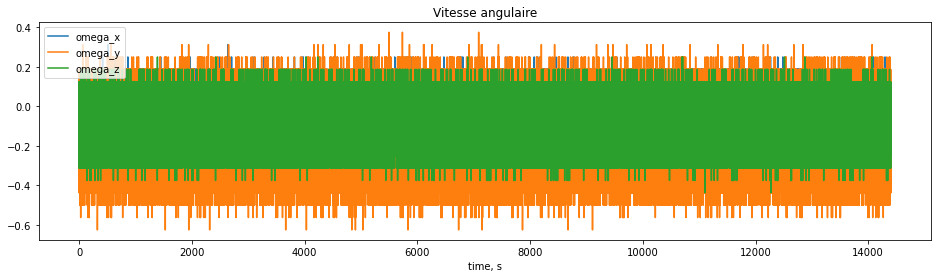

In [7]:
# Affichage des données gyrométriques
plt.figure(figsize=(16, 4))
plt.title('Vitesse angulaire')
plt.plot(gyro)
plt.legend((list(gyro.columns)))
plt.xlabel("time, s")

## Allan variance for gyro and accelerometers

### Gyro Allan variance

Text(0, 0.5, 'normal allan deviation[rad/s]')

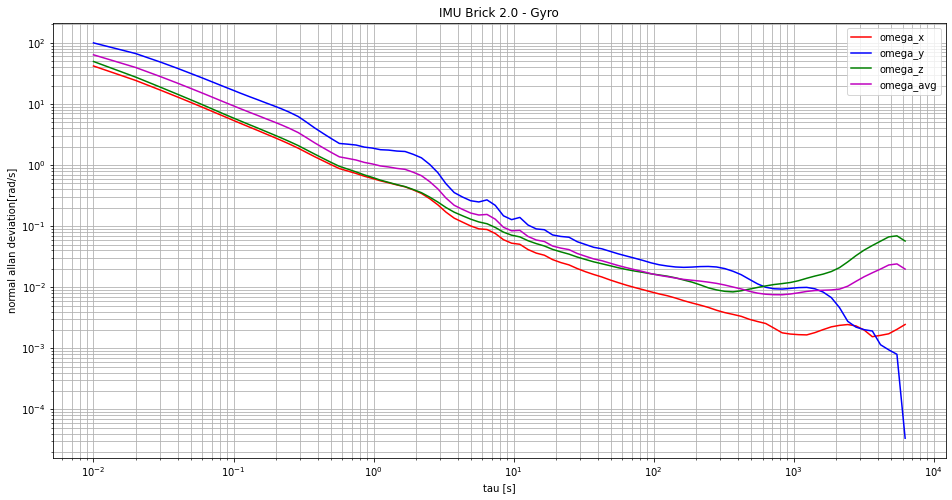

In [8]:
for i in range(0, len(list(gyro.index))):
    dt = 0.01
tau_x, av_x = allan_variance(gyro['omega_x'], dt)
tau_y, av_y = allan_variance(gyro['omega_y'], dt)
tau_z, av_z = allan_variance(gyro['omega_z'], dt)
tau_av = (tau_x + tau_y + tau_z) / 3
av_av = (av_x + av_y + av_z)/3

plt.figure(figsize=(16, 8))

plt.loglog(tau_x, av_x, 'r', label = "omega_x")
plt.loglog(tau_y, av_y, 'b', label = "omega_y")
plt.loglog(tau_z, av_z, 'g', label = "omega_z")
plt.loglog(tau_av, av_av, 'm',label = "omega_avg")

plt.grid(True, which='both')
plt.title("IMU Brick 2.0 - Gyro")
plt.legend()
plt.xlabel("tau [s]")
plt.ylabel("normal allan deviation[rad/s]")

In [9]:
params_x, av_pred_x = params_from_avar(tau_x, av_x, output_type='dict')
params_y, av_pred_y = params_from_avar(tau_y, av_y, output_type='dict')
params_z, av_pred_z = params_from_avar(tau_z, av_z, output_type='dict')
params_av_g, av_pred_av = params_from_avar(tau_av, av_av, output_type='dict')

In [10]:
print('Specifying noise density for average signal : ', params_av_g)

Specifying noise density for average signal :  OrderedDict([('quantization', 0.0), ('white [deg/s.sqrt(Hz)]/[mg/sqrt(Hz)]', 0.9451294406387069), ('flicker', 0.12257902560894278), ('walk [deg/s-2.sqrt(Hz)]/[mg/s.sqrt(Hz)]', 0.001301655792022616), ('ramp :', 2.8236228240490234e-05)])


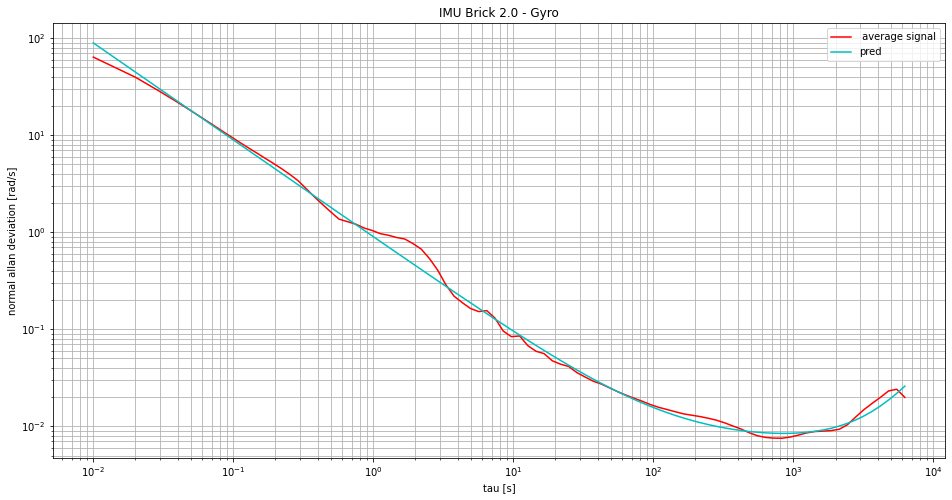

In [11]:
plt.figure(figsize=(16, 8))
plt.loglog(tau_av, av_av, 'r', label = ' average signal')
plt.loglog(tau_av, av_pred_av,'c', label = 'pred')
plt.title("IMU Brick 2.0 - Gyro")
plt.grid(True, which='both')
plt.xlabel("tau [s]")
plt.ylabel("normal allan deviation [rad/s]")
plt.legend()

### Accelerometers  Allan variance

Text(0, 0.5, 'normal allan deviation [m/s-2]')

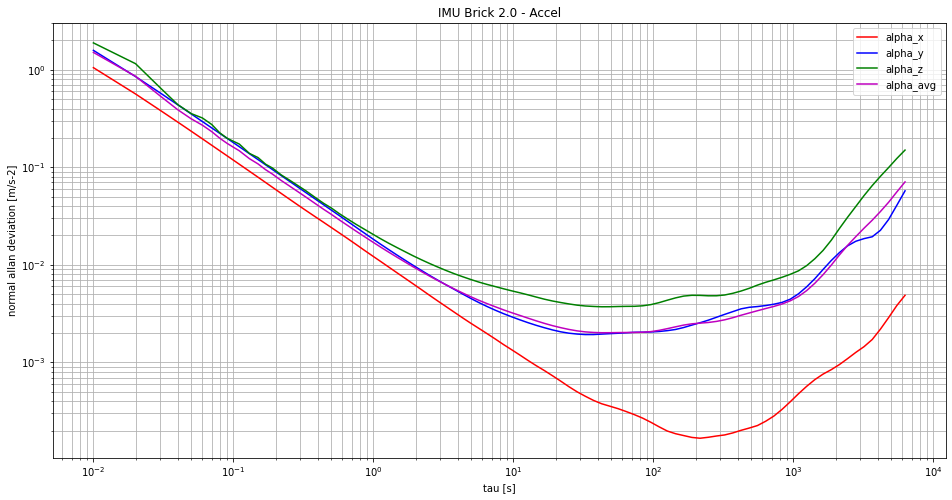

In [12]:
for i in range(0, len(list(accel.index))):
    dt = 0.01
tau_x, av_x = allan_variance(accel['alpha_x'], dt)
tau_y, av_y = allan_variance(accel['alpha_y'], dt)
tau_z, av_z = allan_variance(accel['alpha_z'], dt)
tau_av = (tau_x + tau_y + tau_z) / 3
av_av = (av_x + av_y + av_z)/3

plt.figure(figsize=(16, 8))

plt.loglog(tau_x, av_x, 'r', label = "alpha_x")
plt.loglog(tau_y, av_y, 'b', label = "alpha_y")
plt.loglog(tau_z, av_z, 'g', label = "alpha_z")
plt.loglog(tau_av, av_av, 'm',label = "alpha_avg")

plt.grid(True, which='both')
plt.legend()
plt.title("IMU Brick 2.0 - Accel")
plt.xlabel("tau [s]")
plt.ylabel("normal allan deviation [m/s-2]")

In [13]:
params_x, av_pred_x = params_from_avar(tau_x, av_x, output_type='dict')
params_y, av_pred_y = params_from_avar(tau_y, av_y, output_type='dict')
params_z, av_pred_z = params_from_avar(tau_z, av_z, output_type='dict')
params_av_a, av_pred_av = params_from_avar(tau_av, av_av, output_type='dict')

In [14]:
print('Specifying noise density for average signal : ', params_av_a)

Specifying noise density for average signal :  OrderedDict([('quantization', 0.0014438421498282536), ('white [deg/s.sqrt(Hz)]/[mg/sqrt(Hz)]', 0.12419236890639118), ('flicker', 0.061599774968625384), ('walk [deg/s-2.sqrt(Hz)]/[mg/s.sqrt(Hz)]', 0.002395799084688593), ('ramp :', 5.3261841087110445e-05)])


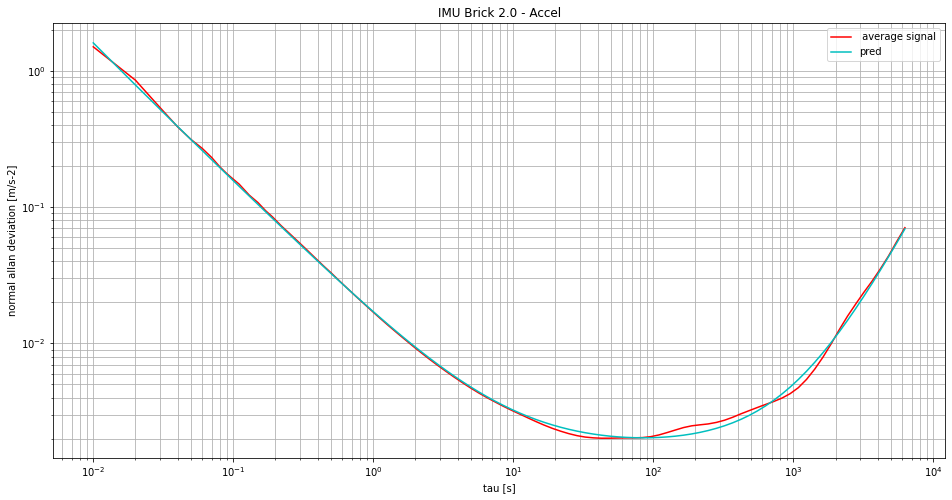

In [15]:
plt.figure(figsize=(16, 8))
plt.loglog(tau_av, av_av, 'r', label = ' average signal')
plt.loglog(tau_av, av_pred_av,'c', label = 'pred')
plt.title("error model for gyro")
plt.grid(True, which='both')
plt.title("IMU Brick 2.0 - Accel")
plt.xlabel("tau [s]")
plt.ylabel("normal allan deviation [m/s-2]")
plt.legend()

## Conversion of white noise and random walk 

In this part what you wanna do is convert noise, and walk from deg/s.sqrt(Hz) and mg/sqrt(Hz) to rad/s.sqrt(Hz) and m/s-2.sqrt(Hz)

In [16]:
gyro_noise = params_av_g['white [deg/s.sqrt(Hz)]/[mg/sqrt(Hz)]']
gyro_walk = params_av_g['walk [deg/s-2.sqrt(Hz)]/[mg/s.sqrt(Hz)]']
accel_noise = params_av_a['white [deg/s.sqrt(Hz)]/[mg/sqrt(Hz)]']
accel_walk = params_av_a['walk [deg/s-2.sqrt(Hz)]/[mg/s.sqrt(Hz)]']

gyro_noise *= pi/180
gyro_walk *= pi/180
accel_noise *= 9.81/1000
accel_walk *= 9.81/1000

print('Gyro : white = ' + str(gyro_noise) + ' [rad/s.sqrt(Hz)] | walk = ' + str(gyro_walk) + 'rad/s-2.sqrt(Hz)')
print('Accel : white = ' + str(accel_noise) + ' [rad/s.sqrt(Hz)] | walk = ' + str(accel_walk) + 'rad/s-2.sqrt(Hz)')



Gyro : white = 0.016495620596677734 [rad/s.sqrt(Hz)] | walk = 2.271817929844919e-05rad/s-2.sqrt(Hz)
Accel : white = 0.0012183271389716976 [rad/s.sqrt(Hz)] | walk = 2.35027890207951e-05rad/s-2.sqrt(Hz)
